# First trying to plot the templates used from Goldhaber. Using the third table for the fitting. 

In [39]:
from astropy.table import Table,Column
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
#import excel data

t = "Template from Goldhaber, -18 and -20 parab turn.csv"


#read in table as an astropy table

Table_T = Table.read(t)
len(Table_T)

76

In [41]:
print(Table_T)

Days  flux
---- -----
 -25   0.0
 -24   0.0
 -23   0.0
 -22   0.0
 -21   0.0
 -20   0.0
 -19 0.005
 -18 0.019
 -17 0.044
 -16  0.08
 ...   ...
  40 0.067
  41 0.065
  42 0.064
  43 0.062
  44  0.06
  45 0.059
  46 0.058
  47 0.057
  48 0.056
  49 0.055
  50 0.054
Length = 76 rows


In [42]:
new_order = ['Days','flux']
Table_T_Final = Table_T[new_order]

#Print final table
Table_T_Final

Days,flux
int32,float64
-25,0.0
-24,0.0
-23,0.0
-22,0.0
-21,0.0
-20,0.0
-19,0.005
-18,0.019
-17,0.044


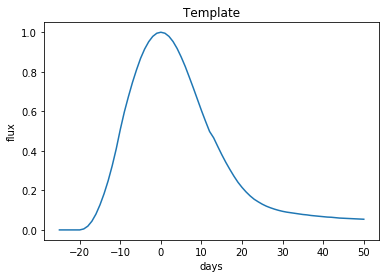

In [43]:
plt.plot(Table_T_Final['Days'],Table_T_Final['flux'])

plt.title('Template')
plt.xlabel('days')
plt.ylabel('flux')

In [ ]:
#want to import my data, will do so in the b filter. Need my flux and time. My days will be different from the template
#and I will need to fix that

In [44]:
data = 'Photometric Data in B brightest CS.csv'

#read in again as astropy table

Table_data = Table.read(data)
len(Table_data)
print(Table_data['flux'])

     flux     
--------------
 5.38239062074
 5.22119987243
 5.20872370832
 5.60950610471
  5.4202388014
 5.11793976194
 5.27457487463
 5.26601758433
 5.54173592741
 4.68859200801
           ...
0.675685316578
0.752060443663
0.715330648716
0.764772401639
0.480001428283
0.517186891355
0.519761371116
0.431549671498
0.487979952191
0.419185885291
0.405311750038
Length = 207 rows


(-20, 50)

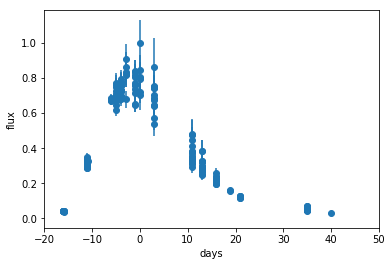

In [45]:

#scaled data to roughly match the template axis

JD_peak = Table_data['JD'][np.argmax(Table_data['flux'])]
plt.errorbar(Table_data['JD']-JD_peak,Table_data['flux']/np.max(Table_data['flux']), yerr = Table_data['fluxerr']/np.max(Table_data['flux']), fmt = 'o')
#plt.xlim(2455800,2455900)

plt.ylabel('flux')
plt.xlabel('days')

#template only goes from -9 to 50 days before and after

plt.xlim(-20,50)


In [31]:
np.argmax(Table_data['flux'])

73

In [32]:
Table_data['JD'][np.argmax(Table_data['flux'])]

2455816.6498379861

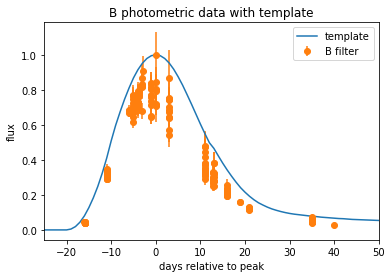

In [50]:
#lets overlap my lightcurve to the template

plt.plot(Table_T_Final['Days'],Table_T_Final['flux'], label = 'template')
plt.errorbar(Table_data['JD']-JD_peak,Table_data['flux']/np.max(Table_data['flux']), yerr = Table_data['fluxerr']/np.max(Table_data['flux']), fmt = 'o', label = 'B filter')

plt.xlim(-25,50)
plt.legend(loc = 'upper right')
plt.xlabel('days relative to peak')
plt.ylabel('flux')
plt.title('B photometric data with template')
plt.show()
